#### In this Use case we will use the advertising dataset to analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. 

### 1. Read & Explore Datset

In [2]:
## Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
## Read & Explore dataset

df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


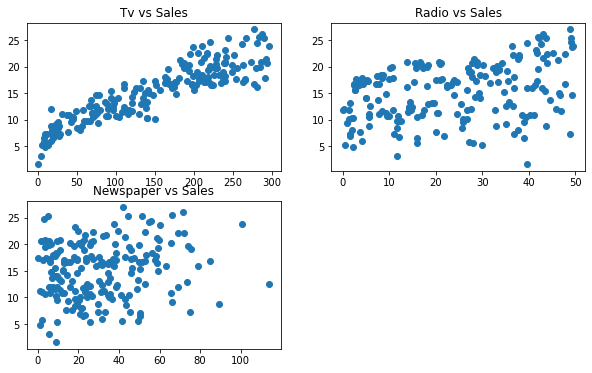

In [10]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.scatter(df.TV,df.Sales)
plt.title("Tv vs Sales")

plt.subplot(2,2,2)
plt.scatter(df.Radio,df.Sales)
plt.title("Radio vs Sales")

plt.subplot(2,2,3)
plt.scatter(df.Newspaper,df.Sales)
plt.title("Newspaper vs Sales")

plt.show()

#### We can clearly see that there is direct correlation between TV & Sales

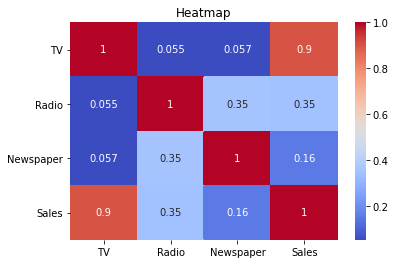

In [17]:
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Heatmap")
plt.show()

#### Again from the Heatmap we can observe that there is high correlation between TV & Sales figure

### 2. Create Simple Linear Regression Model

####  < y = mx + c >

#### Assigning "TV"  as X variable - Independent varaible
#### Assigning "Sales" as y variable - Dependent variable

In [29]:
X = df['TV']
y = df['Sales']

In [30]:
### 2b. Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=100 )

In [34]:
import statsmodels.api as sm

In [35]:
## Building Linear Model
## adding constant

X_train_sm = sm.add_constant(X_train)

## Fit Linear regression using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()


In [36]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           1.52e-52
Time:                        22:51:04   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

##### 1. The coefficient for TV is 0.054, with a very low p value- 

The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

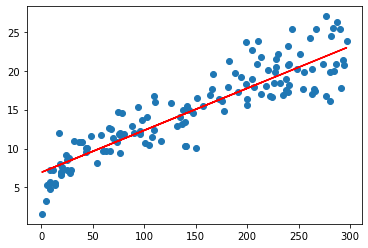

In [39]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

### 3. Prediction on Test Model

In [44]:
## Adding constant

X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)

In [45]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [46]:
r2 = r2_score(y_test, y_pred)
r2

0.7921031601245658

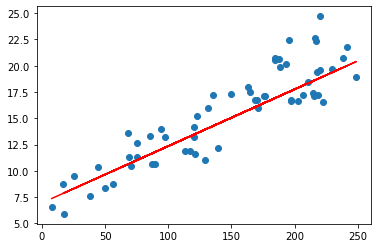

In [47]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()